In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#load the data 
data = pd.read_csv('Social_Network_Ads.csv')

data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
data.shape

(400, 5)

In [6]:
data.describe(include="all")

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400,400.000000,400.000000,400.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,204,NaN,NaN,NaN
mean,1.569154e+07,NaN,37.655000,69742.500000,0.357500
std,7.165832e+04,NaN,10.482877,34096.960282,0.479864
min,1.556669e+07,NaN,18.000000,15000.000000,0.000000
25%,1.562676e+07,NaN,29.750000,43000.000000,0.000000
50%,1.569434e+07,NaN,37.000000,70000.000000,0.000000
75%,1.575036e+07,NaN,46.000000,88000.000000,1.000000


In [7]:
#initial exploration
#re-checking missing values
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
#unique values present in columns
for col in data.columns:
    print(f"Unique values in {col}: {data[col].nunique()}")

Unique values in User ID: 400
Unique values in Gender: 2
Unique values in Age: 43
Unique values in EstimatedSalary: 117
Unique values in Purchased: 2


In [9]:
# drop the user id field which is unique identifier for each user
data.drop('User ID', inplace=True, axis=1)

In [10]:
# check if there are duplicate rows
data[data.duplicated()]

,Gender,Age,EstimatedSalary,Purchased
74,Male,32,18000,0
94,Female,29,83000,0
186,Female,20,82000,0
192,Male,29,43000,0
231,Male,39,42000,0
236,Male,40,57000,0
256,Female,41,72000,0
257,Male,40,57000,0
312,Female,38,50000,0
322,Male,41,52000,0


In [11]:
# drop duplicate rows
data.drop_duplicates(inplace=True)

In [12]:
data.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

Text(0.5, 1.0, 'Boxplot for EstimatedSalary')

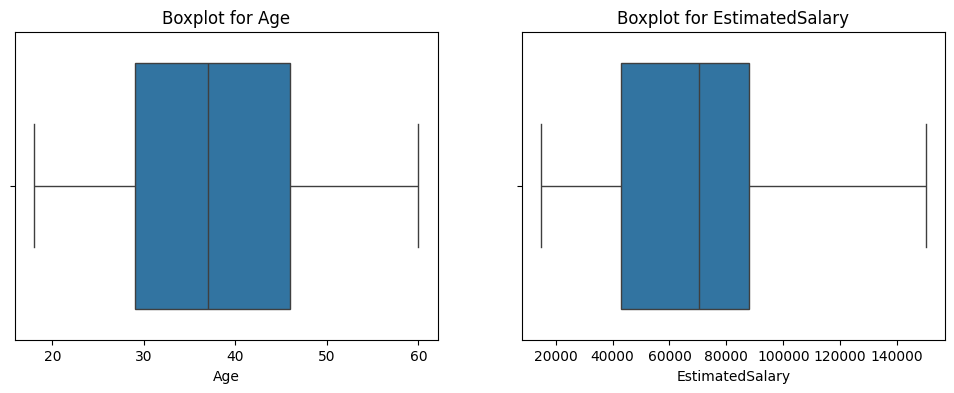

In [14]:
#detecting outliers in numerical columns
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data, x='Age')
plt.title("Boxplot for Age")

plt.subplot(1, 2, 2)
sns.boxplot(data, x='EstimatedSalary')
plt.title("Boxplot for EstimatedSalary")


Text(0.5, 1.0, 'Count (%) for Purchased')

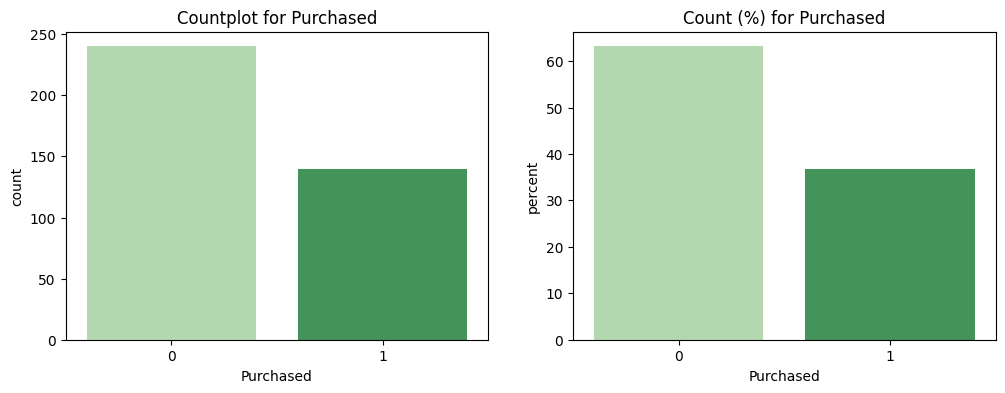

In [110]:
# visualize target
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.countplot(data, x='Purchased', hue='Purchased', legend=False, palette="Greens")
plt.title("Countplot for Purchased")

plt.subplot(1, 2, 2)
sns.countplot(data, x='Purchased', hue='Purchased', legend=False, palette="Greens", stat='percent')
plt.title("Count (%) for Purchased")



Text(0.5, 1.0, 'Countplot of Purchased based on Gender')

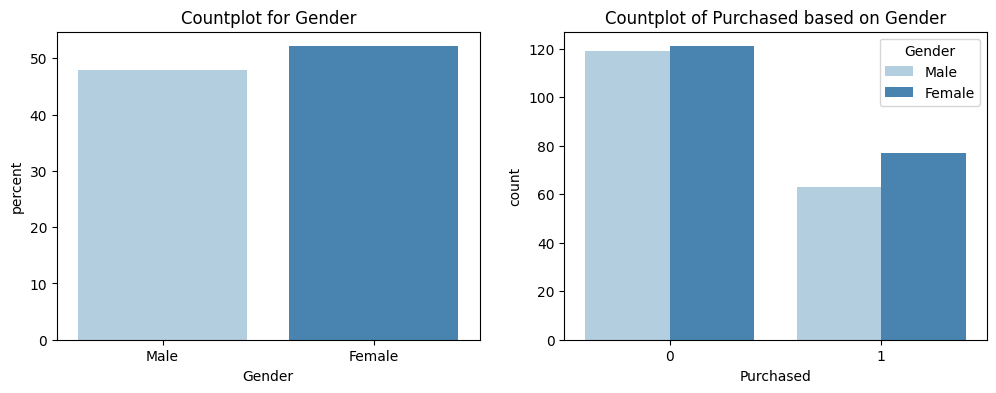

In [15]:
# visualize gender field
# visualize target
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.countplot(data, x='Gender', hue='Gender', legend=False, palette="Blues", stat='percent')
plt.title("Countplot for Gender")

plt.subplot(1, 2, 2)
sns.countplot(data, x='Purchased', hue='Gender', legend=True, palette="Blues")
plt.title("Countplot of Purchased based on Gender")


c:\Users\anjal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\anjal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)


<Figure size 1200x800 with 0 Axes>

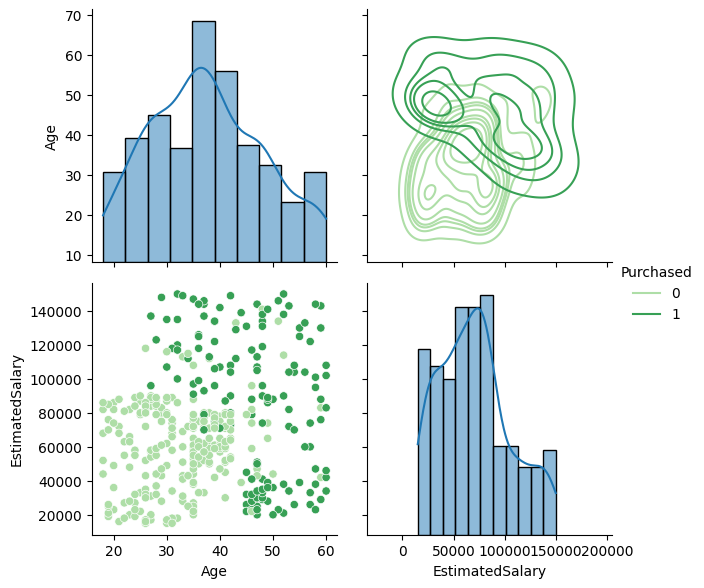

In [112]:
#analyze the numerical variables
plt.figure(figsize=(12,8))
g = sns.PairGrid(data, hue="Purchased", palette="Greens", diag_sharey=False, height=3)
g.map_diag(sns.histplot, hue=None, kde=True)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)
g.add_legend()
plt.show()

Text(0.5, 1.0, 'Boxplot for Purchased by EstimatedSalary')

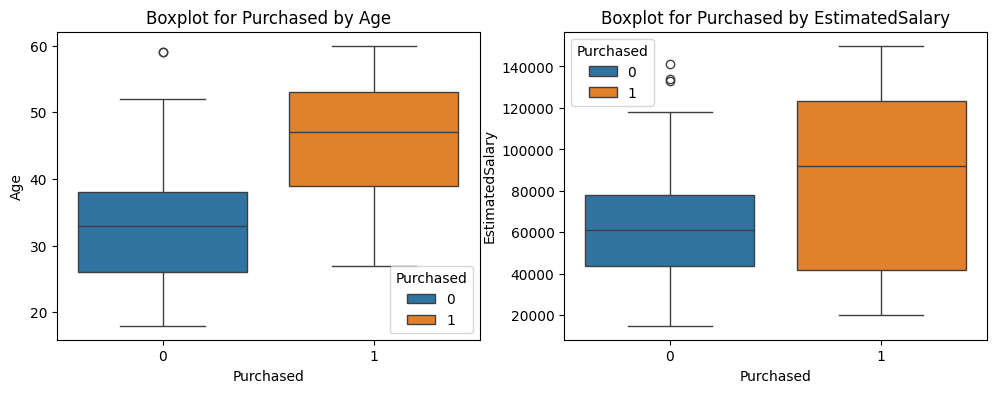

In [113]:
#detecting outliers in numerical columns
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data, x='Purchased', y='Age', hue='Purchased')
plt.title("Boxplot for Purchased by Age")

plt.subplot(1, 2, 2)
sns.boxplot(data, x='Purchased', y='EstimatedSalary', hue='Purchased')
plt.title("Boxplot for Purchased by EstimatedSalary")


In [114]:
data['Age'].describe()

count    380.000000
mean      37.586842
std       10.592492
min       18.000000
25%       29.000000
50%       37.000000
75%       46.000000
max       60.000000
Name: Age, dtype: float64

In [17]:
bins=[18, 26, 40, 52, 60]
labels=['young adult', 'adult', 'middle aged', 'senior']
data['Age_groups'] = pd.cut(data['Age'], bins=bins, labels=labels)
data['Age_groups']

0      young adult
1            adult
2      young adult
3            adult
4      young adult
          ...     
395    middle aged
396    middle aged
397    middle aged
398          adult
399    middle aged
Name: Age_groups, Length: 380, dtype: category
Categories (4, object): ['young adult' < 'adult' < 'middle aged' < 'senior']

Text(0.5, 1.0, 'Boxplot for Age_groups by Purchased')

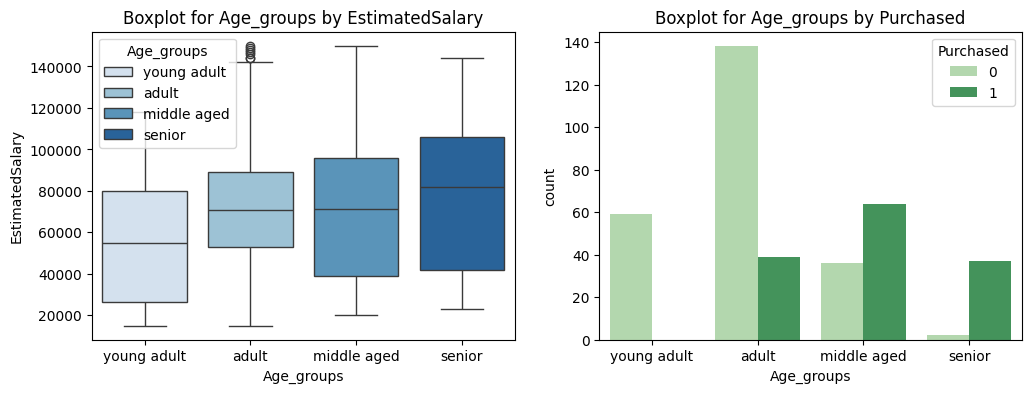

In [18]:
#detecting outliers in numerical columns
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data, x='Age_groups', y='EstimatedSalary', hue='Age_groups', palette="Blues")
plt.title("Boxplot for Age_groups by EstimatedSalary")

plt.subplot(1, 2, 2)
sns.countplot(data, x='Age_groups', hue='Purchased', palette="Greens")
plt.title("Boxplot for Age_groups by Purchased")

In [117]:
#preprocessing pipelines
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num_col = ['EstimatedSalary']
num_pipe = make_pipeline(StandardScaler())

cat_cols=['Age_groups', 'Gender']
cat_pipe = make_pipeline(OneHotEncoder())

preprocess = ColumnTransformer(transformers=[
    ('num_pipe', num_pipe, num_col),
    ('cat_pipe', cat_pipe, cat_cols)
])

In [118]:
# split data into train, test
from sklearn.model_selection import train_test_split

X = data[num_col + cat_cols]
y = data['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

models={
    'Logistic Regression': LogisticRegression(),
    'Random forest classifier': RandomForestClassifier()
}

pipelines = {name: Pipeline(steps=[('preprocess', preprocess), ('classifier', model)]) for name, model in models.items()}

In [120]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
for name, pipe in pipelines.items():
    cv_scores = cross_val_score(pipe, X, y, cv=cv, scoring='roc_auc')
    print(f"\nCV AUC score for {name}: {cv_scores.mean()}")
    cv_scores = cross_val_score(pipe, X, y, cv=cv, scoring='accuracy')
    print(f"CV accuracy score for {name}: {cv_scores.mean()}")


CV AUC score for Logistic Regression: 0.9095238095238095
CV accuracy score for Logistic Regression: 0.781578947368421

CV AUC score for Random forest classifier: 0.9319940476190476
CV accuracy score for Random forest classifier: 0.8789473684210526


In [121]:
rf_model = pipelines['Random forest classifier']
rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['EstimatedSalary']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Age_groups', 'Gender'])])),
                ('classifier', RandomForestClassifier())])

In [122]:
# Predict on train and test data
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)
y_probs_train = rf_model.predict_proba(X_train)[:, 1]
y_probs = rf_model.predict_proba(X_test)[:, 1]

In [123]:
# evaluation
from sklearn import metrics

# for test data
def eval_metrics(test, pred):
#print(f"Classification report for Training dataset: \n{metrics.classification_report(y_train, y_pred_train)}")
    print(f"\nClassification report for Tesing dataset: \n{metrics.classification_report(test, pred)}")
    cm = metrics.confusion_matrix(test, pred)
    metrics.ConfusionMatrixDisplay(cm).plot()

def eval_prob(test, probs):
    print(f"ROC AUC score: {metrics.roc_auc_score(test, probs)}")
    # metrics.RocCurveDisplay.from_predictions(test, probs)
    # plt.plot([0,1], [0,1], linestyle="--", label = "chance level")
    # plt.legend()

    metrics.PrecisionRecallDisplay.from_predictions(test, probs)
    metrics.balanced_accuracy_score

Classification report for Training dataset: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       168
           1       0.96      0.97      0.96        98

    accuracy                           0.97       266
   macro avg       0.97      0.97      0.97       266
weighted avg       0.97      0.97      0.97       266


Classification report for Tesing dataset: 
              precision    recall  f1-score   support

           0       0.91      0.86      0.89        72
           1       0.78      0.86      0.82        42

    accuracy                           0.86       114
   macro avg       0.85      0.86      0.85       114
weighted avg       0.86      0.86      0.86       114

ROC AUC score: 0.9188161375661374


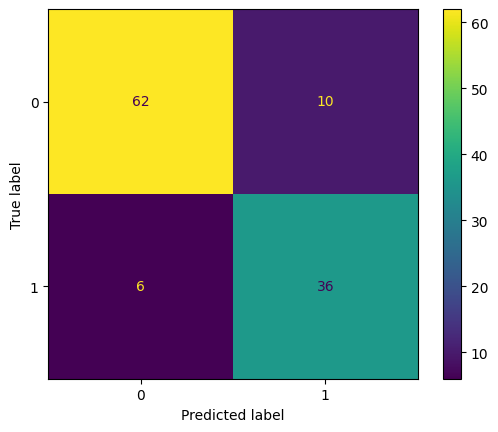

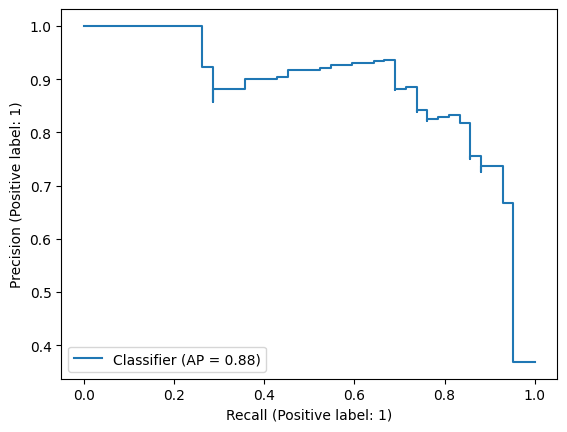

In [124]:

print(f"Classification report for Training dataset: \n{metrics.classification_report(y_train, y_pred_train)}")
eval_metrics(y_test, y_pred_test)
eval_prob(y_test, y_probs)

In [125]:
import numpy as np
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_probs)
f1_scores = 2*(precision*recall)/(precision+recall)
threshold = thresholds[np.argmax(f1_scores)]
threshold

0.65

Classification report for Training dataset: 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       168
           1       1.00      0.90      0.95        98

    accuracy                           0.96       266
   macro avg       0.97      0.95      0.96       266
weighted avg       0.96      0.96      0.96       266


Classification report for Tesing dataset: 
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        72
           1       0.82      0.79      0.80        42

    accuracy                           0.86       114
   macro avg       0.85      0.84      0.85       114
weighted avg       0.86      0.86      0.86       114



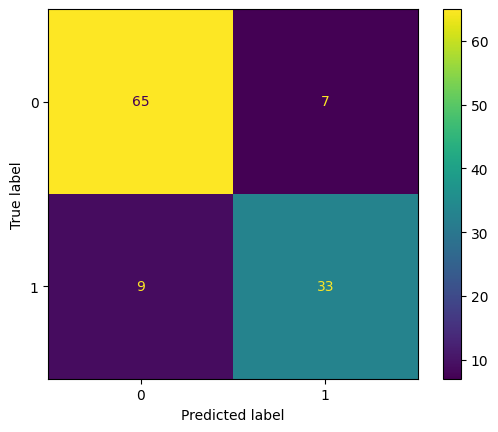

In [126]:
y_pred_new_threshold_train = (y_probs_train >= 0.7).astype(int)
y_pred_new_threshold = (y_probs >= 0.7).astype(int)

print(f"Classification report for Training dataset: \n{metrics.classification_report(y_train, y_pred_new_threshold_train)}")

eval_metrics(y_test, y_pred_new_threshold)

Best params: {'classifier__max_depth': 6, 'classifier__min_samples_leaf': 10}
Classification report for Training dataset: 
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       168
           1       0.83      0.95      0.89        98

    accuracy                           0.91       266
   macro avg       0.90      0.92      0.91       266
weighted avg       0.92      0.91      0.91       266


Classification report for Tesing dataset: 
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        72
           1       0.77      0.88      0.82        42

    accuracy                           0.86       114
   macro avg       0.85      0.86      0.85       114
weighted avg       0.87      0.86      0.86       114

ROC AUC score: 0.9131944444444444


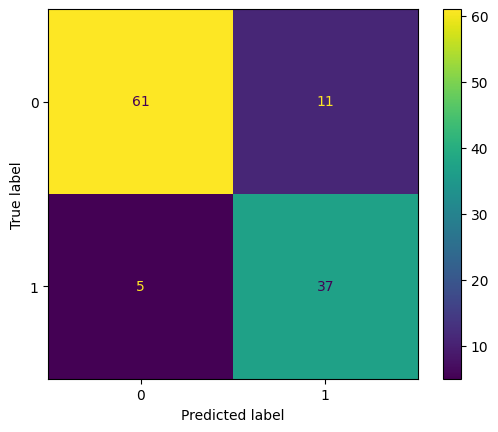

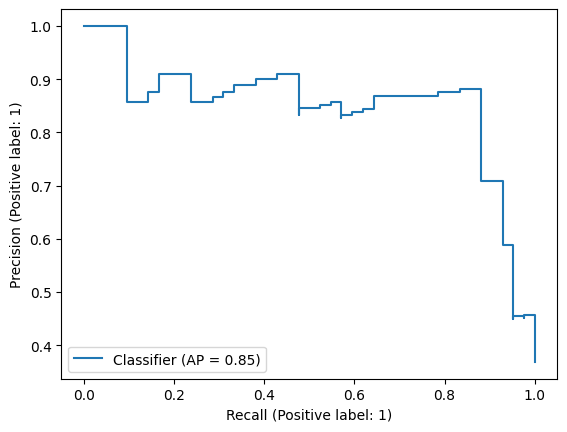

In [132]:
from sklearn.model_selection import GridSearchCV

param={
    'classifier__max_depth':[6,8,10,12,15],
    'classifier__min_samples_leaf':[2, 5, 6, 8, 10]
}

grid = GridSearchCV(estimator=rf_model, param_grid=param, cv=cv, scoring='roc_auc')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print(f"Best params: {grid.best_params_}")

y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

y_probs_train = best_model.predict_proba(X_train)[:, 1]
y_probs = best_model.predict_proba(X_test)[:, 1]


print(f"Classification report for Training dataset: \n{metrics.classification_report(y_train, y_pred_train)}")
eval_metrics(y_test, y_pred_test)
eval_prob(y_test, y_probs)

In [133]:
fpr, tpr, thresholds = metrics.precision_recall_curve(y_test, y_probs)
f1_scores = 2*(precision*recall)/(precision+recall)
threshold = thresholds[np.argmax(f1_scores)]
threshold

0.16792329232928244

Classification report for Training dataset: 
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       168
           1       0.91      0.80      0.85        98

    accuracy                           0.89       266
   macro avg       0.90      0.87      0.88       266
weighted avg       0.90      0.89      0.89       266


Classification report for Tesing dataset: 
              precision    recall  f1-score   support

           0       0.88      0.93      0.91        72
           1       0.87      0.79      0.82        42

    accuracy                           0.88       114
   macro avg       0.88      0.86      0.87       114
weighted avg       0.88      0.88      0.88       114



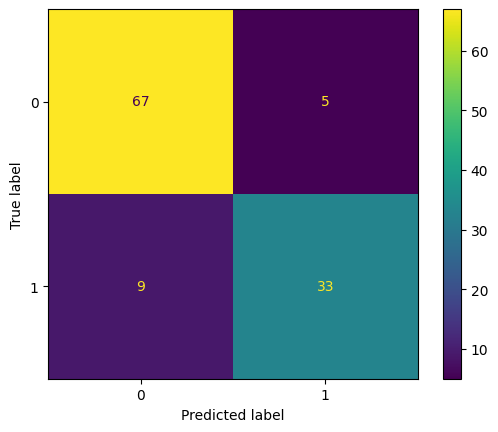

In [135]:
y_threshold_train=(y_probs_train>0.6).astype(int)
y_threshold=(y_probs>0.6).astype(int)

print(f"Classification report for Training dataset: \n{metrics.classification_report(y_train, y_threshold_train)}")
eval_metrics(y_test, y_threshold)